In [1]:
import glob
import matplotlib.pyplot as  plt
%matplotlib inline
import os
import sys
import random
import pdb
import cv2
import json
import numpy as np
sys.path.append('./ldklib') 
import voc_xml


In [2]:
!ls ./duxiandata/

blank  img  xml


### img faker

In [3]:
# imorigin = "./duxiandata/img/red_593_90_90__1.bmp"
# xmlorigin = "./duxiandata/xml/red_593_90_90__1.xml"
# with open(imorigin,'rb') as f:
#     imline = f.read()
# with open(xmlorigin,'rb') as f:
#     xmlline = f.read()
    

# for i in range(100):
#     imin = "./duxiandata/img/red_593_90_90__1_{}.bmp".format(i)
#     xmlin = "./duxiandata/xml/red_593_90_90__1_{}.xml".format(i)
#     with open(imin,'wb') as f:
#         f.write(imline)
#     with open(xmlin,'wb') as f:
#         f.write(xmlline)

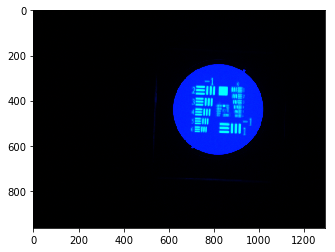

In [4]:
im = cv2.imread('./duxiandata/img/red_593_90_90__1.bmp')
plt.imshow(im)
plt.show()

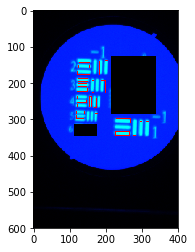

In [5]:
label = voc_xml.voc_xml_get('./duxiandata/xml/red_593_90_90__1.xml')
for lb,box in label:
    xmin,ymin,xmax,ymax = box
    if lb == 'blank':
        cv2.rectangle(im,(xmin,ymin),(xmax,ymax),(0,0,0),thickness = -1)
    else:
        cv2.rectangle(im,(xmin,ymin),(xmax,ymax),(255,0,0))
plt.imshow(im[200:800,600:1000])

plt.show()

## 这里开始是数据处理，输出yolo用的train.txt

将model_data/voc_classes.txt改为h\nv 

In [6]:
with open('model_data/voc_classes.txt', 'r') as f:
    lines = f.readlines()
lines = [l.strip() for l in lines]
len_ = len(lines)
class_dict = {i:l for i,l in zip(lines,range(len_))}
class_dict

{'h': 0, 'v': 1}

In [7]:
inputs = glob.glob("duxiandata/img/*.bmp")

In [8]:
inputs[0]

'duxiandata/img/red_593_90_90__1.bmp'

In [11]:
def saver(im_path):
    trainline = []
    xml_path = im_path.replace('/img/','/xml/').replace('.bmp','.xml')
    labels = voc_xml.voc_xml_get(xml_path)
    im = cv2.imread(im_path)
    for label, box in labels:
        xmin,ymin,xmax,ymax = box
        if label == 'blank':
            cv2.rectangle(im,(xmin,ymin),(xmax,ymax),(0,0,0),thickness = -1)
        else:
            labelline = ','.join(list(map(str,box))+[str(class_dict[label])])
            _ = "{} {}\n".format(im_path,labelline)
            trainline.append(_)
    im_blank_path = im_path.replace('/img/','/blank/')
    cv2.imwrite(im_blank_path,im)
    return trainline
trainlines = []
for i in inputs[:10]:
    t = saver(i)
    trainlines.extend(t)
with open('train.txt','w') as f:
    f.writelines(trainlines)